In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import datetime

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'png'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 
import functions_python as funcs
%load_ext autoreload
%autoreload 2

pd.set_option('display.max_rows', 1000)

In [3]:
# import the dataframe of stations we scored based off of location
highlighted_stations = pd.read_csv('important_stations.csv')

# import, concat, and clean

In [4]:
# read in August and september 2019 mta data
df_list = ['190803', '190810', '190817', '190824', '190831', '190907', '190914', '190921', '190928']

In [5]:
# concatenate the dataframe and add a date_time col
concat_df = funcs.combine_dfs_add_time(df_list)
concat_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY_INT,DAY_STR
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,00:00:00,REGULAR,7148288,2418935,2019-07-27 00:00:00,5,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,04:00:00,REGULAR,7148306,2418939,2019-07-27 04:00:00,5,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,08:00:00,REGULAR,7148326,2418975,2019-07-27 08:00:00,5,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,12:00:00,REGULAR,7148441,2419042,2019-07-27 12:00:00,5,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/27/2019,16:00:00,REGULAR,7148647,2419101,2019-07-27 16:00:00,5,Saturday


In [6]:
#add the time difference
concat_df = funcs.add_entry_and_exit_differences(concat_df)
concat_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY_INT,DAY_STR,ENTRIES_DIFF,EXIT_DIFF
31945,H007,R248,00-00-00,1 AV,L,BMT,07/27/2019,00:00:00,REGULAR,14868945,16617731,2019-07-27 00:00:00,5,Saturday,0.0,0.0
31946,H007,R248,00-00-00,1 AV,L,BMT,07/27/2019,04:00:00,REGULAR,14868945,16617731,2019-07-27 04:00:00,5,Saturday,0.0,0.0
31947,H007,R248,00-00-00,1 AV,L,BMT,07/27/2019,08:00:00,REGULAR,14868945,16617731,2019-07-27 08:00:00,5,Saturday,0.0,0.0
31948,H007,R248,00-00-00,1 AV,L,BMT,07/27/2019,12:00:00,REGULAR,14868945,16617732,2019-07-27 12:00:00,5,Saturday,0.0,1.0
31949,H007,R248,00-00-00,1 AV,L,BMT,07/27/2019,16:00:00,REGULAR,14868945,16617734,2019-07-27 16:00:00,5,Saturday,0.0,2.0


In [7]:
concat_df["ENTRIES_DIFF"].describe()

count    1.853013e+06
mean    -5.437497e+03
std      4.137171e+06
min     -2.129137e+09
25%      8.000000e+00
50%      6.900000e+01
75%      2.250000e+02
max      1.953780e+09
Name: ENTRIES_DIFF, dtype: float64

In [8]:
# clean the data remove the crazy big numbers (entry/exits > 3000)
cleaned_df = funcs.clean_entry_exit_values(concat_df, 3000)
cleaned_df.head()

You removed 22459 rows in the cleaning


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DAY_INT,DAY_STR,ENTRIES_DIFF,EXIT_DIFF
31945,H007,R248,00-00-00,1 AV,L,BMT,07/27/2019,00:00:00,REGULAR,14868945,16617731,2019-07-27 00:00:00,5,Saturday,0.0,0.0
31946,H007,R248,00-00-00,1 AV,L,BMT,07/27/2019,04:00:00,REGULAR,14868945,16617731,2019-07-27 04:00:00,5,Saturday,0.0,0.0
31947,H007,R248,00-00-00,1 AV,L,BMT,07/27/2019,08:00:00,REGULAR,14868945,16617731,2019-07-27 08:00:00,5,Saturday,0.0,0.0
31948,H007,R248,00-00-00,1 AV,L,BMT,07/27/2019,12:00:00,REGULAR,14868945,16617732,2019-07-27 12:00:00,5,Saturday,0.0,1.0
31949,H007,R248,00-00-00,1 AV,L,BMT,07/27/2019,16:00:00,REGULAR,14868945,16617734,2019-07-27 16:00:00,5,Saturday,0.0,2.0


In [9]:
# what percent did we get rid of
(len(concat_df.index) - len(cleaned_df.index) )/ len(concat_df.index)

0.012120260354352614

In [10]:
# describe looks much better, but didnt affect 75 or 50 percentile really, thats good
cleaned_df["ENTRIES_DIFF"].describe()

count    1.830554e+06
mean     1.659849e+02
std      2.402719e+02
min      0.000000e+00
25%      9.000000e+00
50%      7.000000e+01
75%      2.270000e+02
max      2.987000e+03
Name: ENTRIES_DIFF, dtype: float64

# Now We can start analyzing ridership

In [11]:
# Find the total traffic for the whole data frame at each station
totals_per_station = funcs.totals_combined_per_station(cleaned_df)
totals_per_station.sort_values("COMBINED", ascending=False).head()

,ENTRIES_DIFF,EXIT_DIFF,COMBINED
STATION,,,
34 ST-PENN STA,8714449.0,8026585.0,16741034.0
GRD CNTRL-42 ST,7303776.0,6566430.0,13870206.0
34 ST-HERALD SQ,6463263.0,6117308.0,12580571.0
TIMES SQ-42 ST,5422587.0,5175792.0,10598379.0
14 ST-UNION SQ,5403834.0,5149572.0,10553406.0


In [12]:
# Find the avg traffic for the whole data frame at each station
# WE WILL USE THIS LATER TO DETERMINE WHAT STATIONS TO FOCUS ON!!!
avg_per_station = funcs.avg_combined_per_station(cleaned_df)
avg_per_station.sort_values("COMBINED", ascending=False).head()

,ENTRIES_DIFF,EXIT_DIFF,COMBINED
STATION,,,
34 ST-PENN STA,138324.587302,127406.111111,265730.698413
GRD CNTRL-42 ST,115932.952381,104229.047619,220162.000000
34 ST-HERALD SQ,102591.476190,97100.126984,199691.603175
TIMES SQ-42 ST,86072.809524,82155.428571,168228.238095
14 ST-UNION SQ,85775.142857,81739.238095,167514.380952


In [13]:
# calculate the avg traffic on each day of the week for each station
avg_traffic_per_day_of_week = funcs.avg_per_day_of_week(cleaned_df)
avg_traffic_per_day_of_week.head()

/Users/chesh1/Documents/DS/onl20_ds4/curriculum/project-01/project-01-introduction/git-it/metis-project-1-mta-study/Christine_Playground/functions_python.py:130: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_daily_per_station = df.groupby(['STATION', 'DATE','DAY_INT', 'DAY_STR',])["ENTRIES_DIFF", "EXIT_DIFF"].sum()
/Users/chesh1/Documents/DS/onl20_ds4/curriculum/project-01/project-01-introduction/git-it/metis-project-1-mta-study/Christine_Playground/functions_python.py:133: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_daily_per_station = total_daily_per_station.groupby(["STATION","DAY_INT", "DAY_STR"])["ENTRIES_DIFF", "EXIT_DIFF"].mean()


ENTRIES_DIFF     EXIT_DIFF      COMBINED
STATION DAY_INT DAY_STR                                            
1 AV    0       Monday     13744.777778  15721.222222  29466.000000
        1       Tuesday    16417.777778  18115.000000  34532.777778
        2       Wednesday  17289.444444  19241.555556  36531.000000
        3       Thursday   17675.000000  19097.666667  36772.666667
        4       Friday     17775.666667  19705.222222  37480.888889

In [ ]:
# calculate the avg traffic at each time slot on each day for each station
avg_traffic_per_day_per_time_per_station = funcs.avg_per_day_of_week_and_time(cleaned_df)

In [15]:
avg_traffic_per_day_per_time_per_station.head(1000)

ENTRIES_DIFF     EXIT_DIFF  \
STATION         DAY_INT DAY_STR   TIME                                   
1 AV            0       Monday    00:00:00    718.333333    831.777778   
                                  04:00:00    145.666667    153.111111   
                                  08:00:00   1123.000000   2412.000000   
                                  12:00:00   3777.000000   4041.000000   
                                  16:00:00   3194.444444   3123.666667   
                                  20:00:00   4786.333333   5159.666667   
                1       Tuesday   00:00:00   1747.222222   1615.333333   
                                  04:00:00    211.333333    178.888889   
                                  08:00:00   1312.333333   2661.555556   
                                  08:38:01   1014.000000    331.000000   
                                  08:39:22     49.000000     13.000000   
                                  08:40:44    155.000000    554.000000   
                                  08:42:07      4.000000     32.000000   
                                  10:44:54   3184.000000   1907.000000   
                                  12:00:00   3798.888889   4247.555556   
                                  16:00:00   3463.222222   3350.444444   
                                  20:00:00   5395.222222   5746.000000   
                2       Wednesday 00:00:00   2137.444444   1954.222222   
                                  04:00:00    241.000000    197.333333   
                                  08:00:00   1315.888889   2752.555556   
                                  12:00:00   4004.000000   4403.555556   
                                  16:00:00   4060.555556   3727.555556   
                                  20:00:00   5530.555556   6206.333333   
                3       Thursday  00:00:00   2190.111111   1956.333333   
                                  04:00:00    246.333333    180.000000   
                                  08:00:00   1279.000000   2794.000000   
                                  12:00:00   4455.444444   4622.111111   
                                  16:00:00   3886.555556   3595.888889   
                                  20:00:00   5617.555556   5949.333333   
                4       Friday    00:00:00   2343.888889   2167.000000   
                                  04:00:00    298.111111    248.666667   
                                  08:00:00   1152.444444   2619.888889   
                                  12:00:00   4209.333333   4644.777778   
                                  16:00:00   4124.111111   3945.777778   
                                  20:00:00   5647.777778   6079.111111   
                5       Saturday  00:00:00   2089.666667   1906.555556   
                                  04:00:00    445.777778    423.444444   
                                  08:00:00    160.777778    410.000000   
                                  12:00:00    633.333333   1035.111111   
                                  16:00:00   1399.000000   1596.000000   
                                  19:09:53   1386.000000   1685.000000   
                                  19:11:13     19.000000      0.000000   
                                  19:12:36      7.000000      0.000000   
                                  19:13:54      4.000000     12.000000   
                                  19:15:15     12.000000     65.000000   
                                  19:16:35      9.000000      8.000000   
                                  19:17:56      7.000000      5.000000   
                                  19:19:17     14.000000      0.000000   
                                  19:20:38     17.000000      0.000000   
                                  19:21:58     11.000000      3.000000   
                                  19:23:19     10.000000      2.000000   
                                  19:24:39     17.000000      1.000000   
                                  20:00:00   123

# Now We Look At Our Interested Stations

In [16]:
# clean the highlighted stations
highlighted_stations.drop(['Unnamed: 0'], axis=1, inplace=True, errors='ignore')
highlighted_stations.rename(columns={'stations': 'STATION'}, inplace=True)
highlighted_stations.head()

,STATION,university,tech,rich,total score
0,1 AV,False,True,True,3
1,116 ST-COLUMBIA,True,False,False,4
2,135 ST,True,False,False,4
3,137 ST CITY COL,True,False,False,4
4,14 ST,False,True,True,3


In [17]:
# merge with the avg daily ridership df
avg_per_station_with_score = pd.merge(avg_per_station, highlighted_stations, on='STATION')
avg_per_station_with_score.head()

,STATION,ENTRIES_DIFF,EXIT_DIFF,COMBINED,university,tech,rich,total score
0,34 ST-PENN STA,138324.587302,127406.111111,265730.698413,False,False,True,1
1,GRD CNTRL-42 ST,115932.952381,104229.047619,220162.000000,False,False,True,1
2,34 ST-HERALD SQ,102591.476190,97100.126984,199691.603175,False,False,True,1
3,TIMES SQ-42 ST,86072.809524,82155.428571,168228.238095,False,False,True,1
4,14 ST-UNION SQ,85775.142857,81739.238095,167514.380952,False,False,True,1


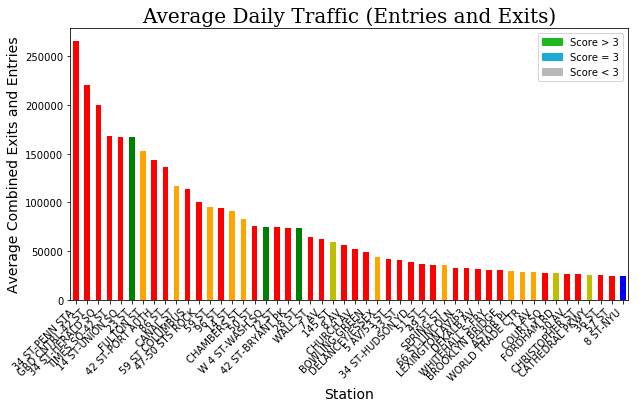

In [57]:
# plot the average ridership per day with the color being score
funcs.create_interested_colored_bar_graph(avg_per_station_with_score, 50)

grey_patch = mpatches.Patch(color='#bab9b7', label='Score < 3')
blue_patch = mpatches.Patch(color='#1DACD6', label='Score = 3')
green_patch = mpatches.Patch(color='#1DB91D', label='Score > 3')


plt.legend(handles=[green_patch, blue_patch, grey_patch])
plt.ylabel('Average Combined Exits and Entries', fontsize = 14);
plt.xlabel('Station', fontsize = 14);
plt.title('Average Daily Traffic (Entries and Exits)', family='serif', fontsize = 20)
plt.xticks(rotation = 45, ha = 'right')
plt.savefig('daily_traffic_with_interested_stations.png');

# Now Lets Figure Out Which Iportant Ones To Focus On

In [19]:
# filter the merged dataframe to keep only the stations with interest score gretater than or = 3
avg_per_station_high_scores = avg_per_station_with_score[avg_per_station_with_score["total score"]>=3]
# take the top 17, this is what we will focus on
focused_stations_df = avg_per_station_high_scores.head(10)
# grab the station row (we will use this as our graph index)
focused_stations = focused_stations_df["STATION"]
# stations we want oprdered by traffic
focused_stations_df
focused_stations_df.to_csv('focused_station.csv')


In [20]:
# perecent of total traffic through these stations
percent_of_total_traffic = focused_stations_df["COMBINED"].sum() / avg_per_station_with_score["COMBINED"].sum()
percent_of_total_traffic

0.224799889097257

In [21]:
# percent of important traffic through these stations
percent_of_important_traffic = focused_stations_df["COMBINED"].sum() / avg_per_station_high_scores["COMBINED"].sum()
percent_of_important_traffic

0.7216588869667623

In [22]:
# add a normalized column
avg_per_station_high_scores["NORMALIZED_TRAFFIC"] = avg_per_station_high_scores["COMBINED"]/avg_per_station_high_scores["COMBINED"].sum()

/Users/chesh1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


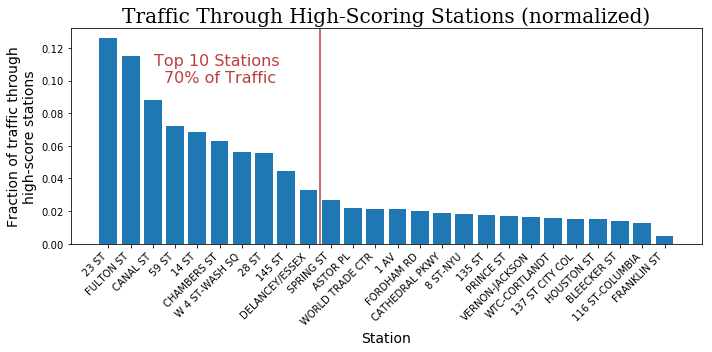

In [62]:
# plot the percentage of each station as it compares to all important stations
plt.figure(figsize=[10,5])
plt.bar(avg_per_station_high_scores["STATION"], avg_per_station_high_scores["COMBINED"]/avg_per_station_high_scores["COMBINED"].sum())
plt.ylabel('Fraction of traffic through\nhigh-score stations', fontsize = 14);
plt.xlabel('Station', fontsize = 14);
plt.title('Traffic Through High-Scoring Stations (normalized)', family='serif', fontsize = 20);
plt.text(5,0.099,'Top 10 Stations \n70% of Traffic',fontsize = 16,color = 'xkcd:dull red', ha = 'center');
plt.axvline(x=9.5, color='xkcd:dull red')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('normalized_important_traffic.png');

# Now Lets Look At When To Focus

AttributeError: module 'functions_python' has no attribute 'create_day_of_week_stacked_bar_graph'

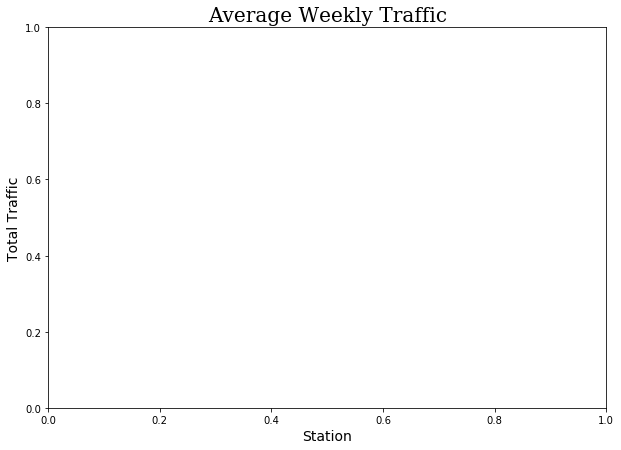

In [24]:
# look at what days we should focus on
plt.figure(figsize=[10,7])
plt.ylabel('Total Traffic', fontsize = 14);
plt.xlabel('Station', fontsize = 14);
plt.title('Average Weekly Traffic', family='serif', fontsize = 20)
funcs.create_day_of_week_stacked_bar_graph(avg_traffic_per_day_of_week, focused_stations)
plt.savefig('weekly_stacked_traffic.png');

In [25]:
# combine days of week
focused_mask = avg_traffic_per_day_of_week.reset_index()["STATION"].isin(focused_stations)
avg_traffic_per_day_of_week_focused = avg_traffic_per_day_of_week.reset_index()[focused_mask]
avg_traffic_per_day_of_week_focused.head()

,STATION,DAY_INT,DAY_STR,ENTRIES_DIFF,EXIT_DIFF,COMBINED
91,14 ST,0,Monday,47746.666667,43328.777778,91075.444444
92,14 ST,1,Tuesday,55877.000000,47834.555556,103711.555556
93,14 ST,2,Wednesday,57202.222222,48386.111111,105588.333333
94,14 ST,3,Thursday,57670.000000,49478.555556,107148.555556
95,14 ST,4,Friday,56235.777778,48421.888889,104657.666667


In [26]:
# add normalized column
aggregated_per_day_of_week = avg_traffic_per_day_of_week_focused.groupby(["DAY_STR","DAY_INT"])[["ENTRIES_DIFF", "EXIT_DIFF", "COMBINED"]].sum()
aggregated_per_day_of_week["COMBINED_NORMALIZED"] = aggregated_per_day_of_week["COMBINED"] / aggregated_per_day_of_week["COMBINED"].sum()
aggregated_per_day_of_week

,,ENTRIES_DIFF,EXIT_DIFF,COMBINED,COMBINED_NORMALIZED
DAY_STR,DAY_INT,,,,
Friday,4,604395.111111,501538.555556,1.105934e+06,0.165014
Monday,0,529592.888889,455457.666667,9.850506e+05,0.146977
Saturday,5,342982.000000,300772.666667,6.437547e+05,0.096053
Sunday,6,282018.777778,250617.444444,5.326362e+05,0.079473
Thursday,3,630561.666667,527375.222222,1.157937e+06,0.172773
Tuesday,1,614264.666667,512853.555556,1.127118e+06,0.168175
Wednesday,2,628310.444444,521333.000000,1.149643e+06,0.171535


In [27]:
aggregated_per_day_of_week = aggregated_per_day_of_week.reset_index().sort_values(by=["DAY_INT"])
aggregated_per_day_of_week

,DAY_STR,DAY_INT,ENTRIES_DIFF,EXIT_DIFF,COMBINED,COMBINED_NORMALIZED
1,Monday,0,529592.888889,455457.666667,9.850506e+05,0.146977
5,Tuesday,1,614264.666667,512853.555556,1.127118e+06,0.168175
6,Wednesday,2,628310.444444,521333.000000,1.149643e+06,0.171535
4,Thursday,3,630561.666667,527375.222222,1.157937e+06,0.172773
0,Friday,4,604395.111111,501538.555556,1.105934e+06,0.165014
2,Saturday,5,342982.000000,300772.666667,6.437547e+05,0.096053
3,Sunday,6,282018.777778,250617.444444,5.326362e+05,0.079473


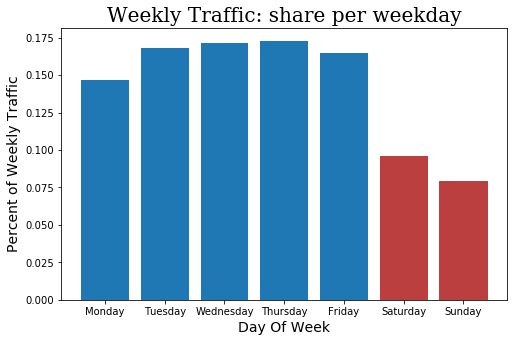

In [49]:
# plot the normalized traffic on each day of the week
plt.figure(figsize=[8,5])
barlist = plt.bar(aggregated_per_day_of_week["DAY_STR"], aggregated_per_day_of_week["COMBINED_NORMALIZED"])
barlist[5].set_color('xkcd:dull red')
barlist[6].set_color('xkcd:dull red')
plt.ylabel('Percent of Weekly Traffic', fontsize = 14);
plt.xlabel('Day Of Week', fontsize = 14);
plt.title('Weekly Traffic: share per weekday', family='serif', fontsize = 20)
plt.savefig('normalized by day.png');

In [31]:
# look at time and days of week
focused_time_mask = avg_traffic_per_day_per_time_per_station.reset_index()["STATION"].isin(focused_stations)
avg_traffic_per_day_per_time_per_station = avg_traffic_per_day_per_time_per_station.reset_index()[focused_time_mask]


In [ ]:
avg_traffic_per_day_per_time_per_station.head(30)

In [32]:
# convert time to time
avg_traffic_per_day_per_time_per_station["TIME"] = pd.to_datetime(avg_traffic_per_day_per_time_per_station["TIME"], format='%H:%M:%S').dt.time

In [33]:
# create datetime time objects to make buckets
midnight = datetime.time(0,1,0,0)
four_am = datetime.time(4,0,0,0)
eight_am = datetime.time(8,0,0,0)
noon = datetime.time(12,0,0,0)
four_pm = datetime.time(16,0,0,0)
eight_pm = datetime.time(20,0,0,0)


In [34]:
# use these time objects to create masks to create buckets
midnight_mask = avg_traffic_per_day_per_time_per_station["TIME"] < midnight

four_mask = (avg_traffic_per_day_per_time_per_station["TIME"] > midnight) & \
(avg_traffic_per_day_per_time_per_station["TIME"] <= four_am)

eight_mask = (avg_traffic_per_day_per_time_per_station["TIME"] > four_am) & \
(avg_traffic_per_day_per_time_per_station["TIME"] <= eight_am)

noon_mask = (avg_traffic_per_day_per_time_per_station["TIME"] > eight_am) & \
(avg_traffic_per_day_per_time_per_station["TIME"] <= noon)

sixteen_mask = (avg_traffic_per_day_per_time_per_station["TIME"] > noon) & \
(avg_traffic_per_day_per_time_per_station["TIME"] <= four_pm)

twenty_mask = (avg_traffic_per_day_per_time_per_station["TIME"] > four_pm) & \
(avg_traffic_per_day_per_time_per_station["TIME"] <= eight_pm)


In [35]:
# create buckets of times with their totals
traffic_list = [
    avg_traffic_per_day_per_time_per_station[four_mask]["COMBINED"].sum(),
    avg_traffic_per_day_per_time_per_station[eight_mask]["COMBINED"].sum(),
    avg_traffic_per_day_per_time_per_station[noon_mask]["COMBINED"].sum(),
    avg_traffic_per_day_per_time_per_station[sixteen_mask]["COMBINED"].sum(),
    avg_traffic_per_day_per_time_per_station[twenty_mask]["COMBINED"].sum(),
    avg_traffic_per_day_per_time_per_station[midnight_mask]["COMBINED"].sum()
]

In [ ]:
traffic_list

In [36]:
norm_traffic_list = [x / sum(traffic_list) for x in traffic_list]
norm_traffic_list

[0.05991537055217397,
 0.052677838118240713,
 0.24195761484603412,
 0.24867798744688985,
 0.334035617094056,
 0.06273557194260529]

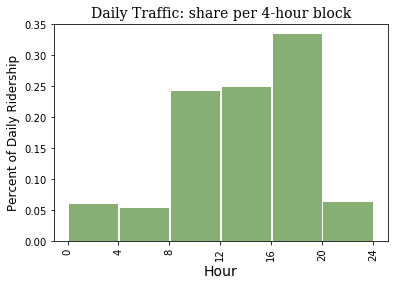

In [48]:
hour_list = [4, 8, 12, 16, 20, 24]
plt.bar(hour_list, norm_traffic_list, width=-3.9, align='edge', color="xkcd:sage")
ticks_x = np.linspace(0, 24, 7)
plt.xticks(ticks_x)
plt.ylabel('Percent of Daily Ridership', fontsize = 12);
plt.xlabel('Hour', fontsize = 14);
plt.title('Daily Traffic: share per 4-hour block', family='serif', fontsize = 14);
plt.xticks(rotation=90)
plt.savefig('normalized_time_of_day.png');

# Try To Get a Heat Map

In [ ]:
locations_df = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')
locations_df.head()

In [ ]:
len(cleaned_df.STATION.unique()), len(locations_df["Stop Name"].unique())

In [ ]:
locations_df.rename(columns={"Stop Name":"STATION"}, inplace=True)
locations_df["STATION"] = locations_df["STATION"].str.lower()
locations_df.head()

In [ ]:
avg_per_station = avg_per_station.reset_index()
avg_per_station["STATION"] = avg_per_station["STATION"].str.lower()
avg_per_station.head()

In [ ]:
avg_with_loc = pd.merge(avg_per_station, locations_df,on="STATION")

In [ ]:
len(avg_with_loc["STATION"].unique())

In [ ]:
thirtyFour = cleaned_df[cleaned_df["STATION"]=="34 ST-PENN STA"]